In [1]:
import keras
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from models.lenet_official import LeNet
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import numpy as np
from dataset_loaders import SimpleDatasetLoader
from imutils import paths
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
sdl = SimpleDatasetLoader()

In [3]:
image_paths = list(paths.list_images('./datasets/digits'))

In [4]:
(data, labels) = sdl.load(image_paths, verbose=500)

[INFO] processed 500/2301
[INFO] processed 1000/2301
[INFO] processed 1500/2301
[INFO] processed 2000/2301


In [5]:
data = data.astype("float") / 255.0

In [6]:
# partition the data into training and testing splits using 75% of
# the data for training and the remaining 25% for testing
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(data, labels, test_size=0.25, random_state=42)

In [7]:
# convert the labels from integers to vectors
y_train = LabelBinarizer().fit_transform(y_train)
y_test = LabelBinarizer().fit_transform(y_test)

In [8]:
y_train.shape,x_train.shape

((1725, 10), (1725, 28, 28))

In [9]:
x_train = x_train.reshape(x_train.shape[0],28,28,1)

In [10]:
x_test = x_test.reshape(x_test.shape[0],28,28,1)

In [11]:
from keras.optimizers import SGD
opt = SGD(lr=0.01)
model = LeNet.build(width=28, height=28, depth=1, num_classes=10)

In [12]:
model.compile(loss="categorical_crossentropy", optimizer=opt,
              metrics=["accuracy"])

In [13]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1725, 28, 28, 1), (576, 28, 28, 1), (1725, 10), (576, 10))

In [19]:
H = model.fit(x_train, y_train, validation_data=(x_test, y_test),batch_size=64, epochs=100, verbose=1)

Train on 1725 samples, validate on 576 samples
Epoch 1/100
1725/1725 [==============================] - 0s 174us/step - loss: 1.3376 - acc: 0.5959 - val_loss: 1.1582 - val_acc: 0.7622
Epoch 2/100
1725/1725 [==============================] - 0s 165us/step - loss: 1.2222 - acc: 0.6336 - val_loss: 1.0244 - val_acc: 0.7969
Epoch 3/100
1725/1725 [==============================] - 0s 155us/step - loss: 1.1065 - acc: 0.6759 - val_loss: 0.9313 - val_acc: 0.8420
Epoch 4/100
1725/1725 [==============================] - 0s 154us/step - loss: 1.0239 - acc: 0.7136 - val_loss: 0.8207 - val_acc: 0.8854
Epoch 5/100
1725/1725 [==============================] - 0s 160us/step - loss: 0.9252 - acc: 0.7357 - val_loss: 0.7387 - val_acc: 0.8733
Epoch 6/100
1725/1725 [==============================] - 0s 156us/step - loss: 0.8318 - acc: 0.7670 - val_loss: 0.6624 - val_acc: 0.8594
Epoch 7/100
1725/1725 [==============================] - 0s 155us/step - loss: 0.7627 - acc: 0.7843 - val_loss: 0.5950 - val_acc: 0

1725/1725 [==============================] - 0s 153us/step - loss: 0.0990 - acc: 0.9814 - val_loss: 0.0950 - val_acc: 0.9844
Epoch 61/100
1725/1725 [==============================] - 0s 153us/step - loss: 0.0945 - acc: 0.9843 - val_loss: 0.0945 - val_acc: 0.9844
Epoch 62/100
1725/1725 [==============================] - 0s 155us/step - loss: 0.0897 - acc: 0.9809 - val_loss: 0.0947 - val_acc: 0.9861
Epoch 63/100
1725/1725 [==============================] - 0s 156us/step - loss: 0.0971 - acc: 0.9803 - val_loss: 0.0952 - val_acc: 0.9826
Epoch 64/100
1725/1725 [==============================] - 0s 158us/step - loss: 0.0902 - acc: 0.9820 - val_loss: 0.0925 - val_acc: 0.9861
Epoch 65/100
1725/1725 [==============================] - 0s 160us/step - loss: 0.0878 - acc: 0.9849 - val_loss: 0.0943 - val_acc: 0.9844
Epoch 66/100
1725/1725 [==============================] - 0s 156us/step - loss: 0.0865 - acc: 0.9820 - val_loss: 0.0927 - val_acc: 0.9861
Epoch 67/100
1725/1725 [=======================

In [20]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model.predict(x_test, batch_size=64)
print(classification_report(y_test.argmax(axis=1),
                            predictions.argmax(axis=1),
                            target_names=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']))

[INFO] evaluating network...
             precision    recall  f1-score   support

          0       0.99      1.00      0.99        86
          1       0.97      0.98      0.98        63
          2       1.00      1.00      1.00        75
          3       0.96      0.96      0.96        49
          4       1.00      0.98      0.99        51
          5       1.00      1.00      1.00        43
          6       1.00      1.00      1.00        43
          7       1.00      1.00      1.00        53
          8       0.96      0.98      0.97        53
          9       0.97      0.93      0.95        60

avg / total       0.98      0.98      0.98       576



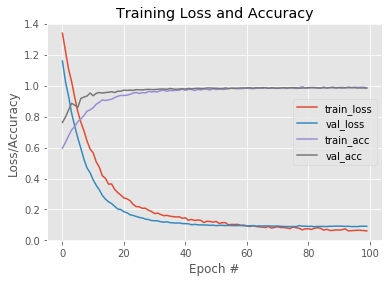

In [22]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 100), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 100), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, 100), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, 100), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.show()

In [23]:
# construct the image generator for data augmentation
aug = ImageDataGenerator(rotation_range=30, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")

NameError: name 'ImageDataGenerator' is not defined